<a href="https://colab.research.google.com/github/villafue/Machine_Learning_Notes/blob/master/Supervised_Learning/Supervised%20Learning%20with%20Scikit-Learn/Time%20Series%20Analysis%20in%20Python/1%20Correlation%20and%20Autocorrelation/1%20Correlation_and_Autocorrelation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Correlation and Autocorrelation

In this chapter you'll be introduced to the ideas of correlation and autocorrelation for time series. Correlation describes the relationship between two time series and autocorrelation describes the relationship of a time series with its past values.

# Introduction to Course

1. Introduction to the Course
Welcome to the first video of the "Introduction to Times Series Analysis Using Python" course. My name is Rob Reider. I'm an Adjunct Professor in the Math-Finance Master's program at NYU's Courant Institute, where I teach a course on Time Series Analysis. I'm also a consultant to a company called Quantopian, which has built a Python-based platform for analyzing and backtesting quantitative trading strategies. Authors of algorithms can enter into paper trading contests and be considered for an allocation of money. Authors receiving allocations are paid 10 percent of the strategy’s net profits, based on their strategy’s individual performance. Also, Quantopian hosts a community where members can ask for help, share ideas, and discuss and share code.

2. Example of Time Series: Google Trends
Time series analysis deals with data that is ordered in time. Of course, there are many other types of data that are not covered in this course - for example, cross-sectional data that are taken at one point in time. Time series come up in many contexts. Here is a time series of the frequency of Google searches for the word "diet" over a five year period. You can see an interesting pattern: it hits a low around the holidays, and then spikes up at the beginning of the year when people make New Year's resolutions to lose weight.

3. Example of Time Series: Climate Data
Here is another example of a time series: the average annual temperature in New York City since 1870. Notice that this time series is trending up. Many of the most interesting applications of time series analysis are financial time series. In this course, you will look at a variety of financial time series: stocks, bonds, commodities, even crytpocurrencies like Bitcoin.

4. Example of Time Series: Quarterly Earnings Data
Here is the time series of quarterly earnings for the company H&R Block. H&R Block is in the business of preparing tax returns for customers and selling tax software. The vast majority of their earnings occurs in the quarter that taxes are due. Notice the strong seasonality pattern in the earnings.

5. Example of Multiple Series: Natural Gas and Heating Oil
You will also look at two related series in the last chapter of this course. Here are the prices of two energy commodities, heating oil and natural gas, which move together.

6. Goals of Course
In this course, you will learn about various time series models, fit the data to these models, and use these models to make forecasts of the future. You will also learn how to use various statistical packages in Python to perform these tasks. Numerous examples will be provided, and I hope that these examples not only demonstrate how to apply these tools, but also address some interesting puzzles, mainly in the field of finance.

7. Some Useful Pandas Tools
In the course of analyzing time series data, you will use several convenient pandas tools for manipulating times series data. These methods will be used repeatedly throughout the course, so we will highlight a few of them now: to_datetime() is used to convert an index, often read in as a string, into a datetime index. The plot method of pandas is a quick way to plot data, and if the index has been converted to a datetime object, you can slice the data by year, for example. You will sometimes need to merge or join two DataFrames.

8. Some Useful Pandas Tools
For example, one DataFrame may contain stock prices and another DataFrame may contain bond prices. Pandas makes it easy to resample data. For example, a DataFrame of daily data can be converted to weekly data with the resample method

9. More pandas Functions
Often, you will want to convert prices to returns, which you can do with the pct_change method. Or if you want differences, you can use the diff method. You can compute the correlation of two series using the corr method, and the autocorrelation using the autocorr method. You'll learn more about these methods later in this chapter.

10. Let's practice!
Now let's practice using a few of these time series tools.

# A "Thin" Application of Time Series

[Google Trends](https://trends.google.com/trends/?geo=US) allows users to see how often a term is searched for. We downloaded a file from Google Trends containing the frequency over time for the search word "diet", which is pre-loaded in a DataFrame called diet. A first step when analyzing a time series is to visualize the data with a plot. You should be able to clearly see a gradual decrease in searches for "diet" throughout the calendar year, hitting a low around the December holidays, followed by a spike in searches around the new year as people make New Year's resolutions to lose weight.

Like many time series datasets you will be working with, the index of dates are strings and should be converted to a datetime index before plotting.

This course touches on a lot of concepts you may have forgotten, so if you ever need a quick refresher, download the [pandas basics Cheat Sheet](https://datacamp-community-prod.s3.amazonaws.com/fbc502d0-46b2-4e1b-b6b0-5402ff273251) and keep it handy!

**Instructions**

1. Convert the date index to datetime using pandas's to_datetime().

2. Plot the time series and set the argument grid to True to better see the year-ends.

3. Slice the diet dataset to keep only values from 2012, assigning to diet2012.
Plot the diet2012, again creating gridlines with the grid argument.


In [ ]:
# Import pandas and plotting modules
import pandas as pd
import matplotlib.pyplot as plt

# Convert the date index to datetime
diet.index = pd.to_datetime(diet.index)

# Plot the entire time series diet and show gridlines
diet.plot(grid=True)
plt.show()

# Slice the dataset to keep only 2012
diet2012 = diet['2012']

# Plot 2012 data
diet2012.plot(grid=True)
plt.show()

**Conclusion**

Notice how searches for 'diet' spiked up after the holidays every year.

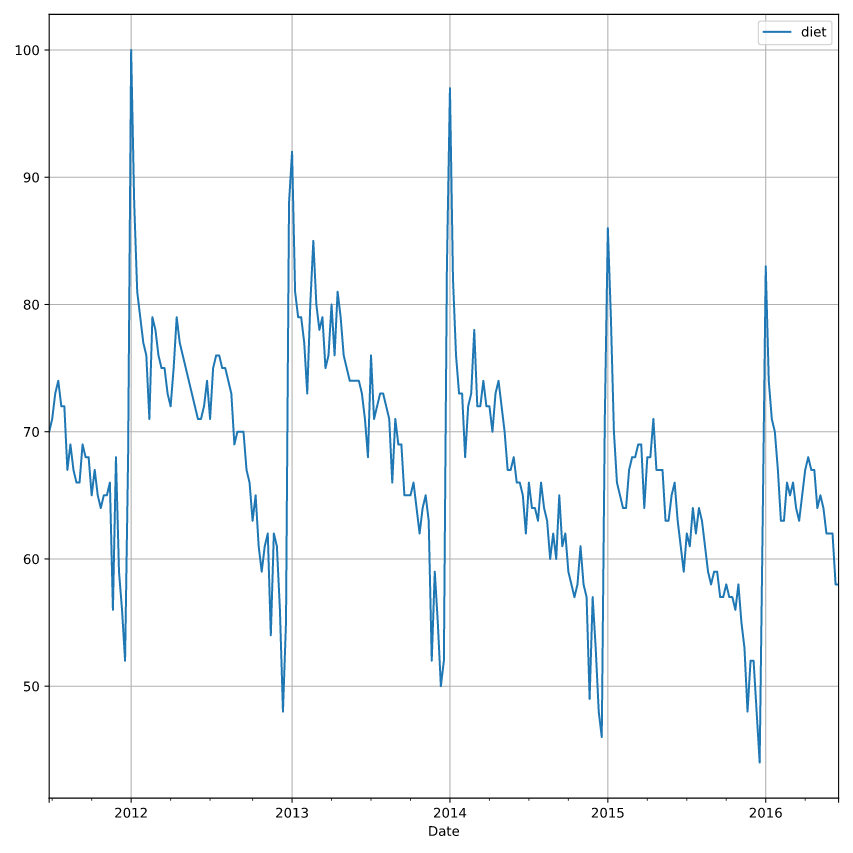

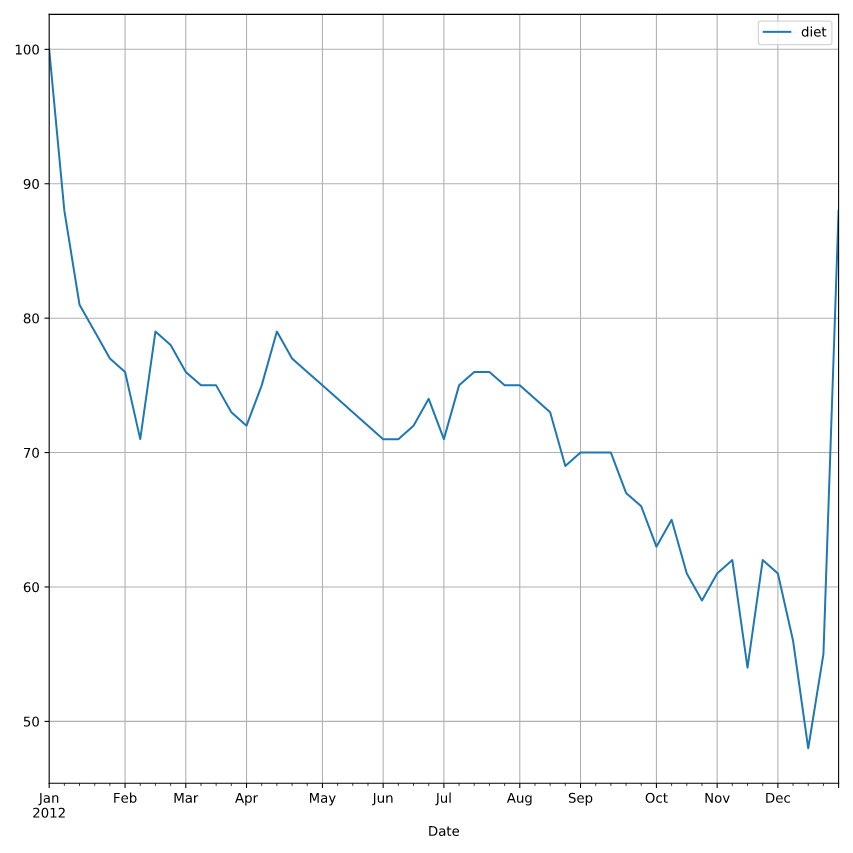

# Merging Time Series With Different Dates

Stock and bond markets in the U.S. are closed on different days. For example, although the bond market is closed on Columbus Day (around Oct 12) and Veterans Day (around Nov 11), the stock market is open on those days. One way to see the dates that the stock market is open and the bond market is closed is to convert both indexes of dates into sets and take the difference in sets.

The pandas .join() method is a convenient tool to merge the stock and bond DataFrames on dates when both markets are open.

Stock prices and 10-year US Government bond yields, which were downloaded from [FRED](https://fred.stlouisfed.org/), are pre-loaded in DataFrames stocks and bonds.

Instructions

1. Convert the dates in the stocks.index and bonds.index into sets.

2. Take the difference of the stock set minus the bond set to get those dates where the stock market has data but the bond market does not.

3. Merge the two DataFrames into a new DataFrame, stocks_and_bonds using the .join() method, which has the syntax df1.join(df2).

4. To get the intersection of dates, use the argument how='inner'.

Conclusions

Pandas helps make many time series tasks quick and efficient.

In [ ]:
# Import pandas
import pandas as pd

# Convert the stock index and bond index into sets
set_stock_dates = set(stocks.index)
set_bond_dates = set(bonds.index)

# Take the difference between the sets and print
print(set_stock_dates - set_bond_dates)

# Merge stocks and bonds DataFrames using join()
stocks_and_bonds = stocks.join(bonds, how = 'inner')

'''
<script.py> output:
    {'2015-10-12', '2009-10-12', '2017-06-09', '2009-11-11', '2012-10-08', '2012-11-12', '2008-11-11', '2007-11-12', '2016-11-11', '2011-10-10', '2014-10-13', '2007-10-08', '2010-11-11', '2008-10-13', '2014-11-11', '2013-11-11', '2010-10-11', '2016-10-10', '2011-11-11', '2013-10-14', '2015-11-11'}

'''

# Correlation of Two Time Series

Got It!
1. Correlation of Two Time Series
Often, two time series vary together.

2. Correlation of Two Time Series
Often, two time series vary together. Here is a plot of the stock prices of JP Morgan and the S&P500. You can see from this plot that, in general, when the market drops, JP Morgan drops as well, and when the market rises, JP Morgan also rises.

3. Correlation of Two Time Series
A scatter plot of the returns of JP Morgan and the returns of the market help to visualize the relationship between the two time series.

4. More Scatter Plots
The correlation coefficient is a measure of how much two series vary together. A correlation of one means that the two series have a perfect linear relationship with no deviations. High correlations mean that the two series strongly vary together. A low correlation means they vary together, but there is a weak association. And a high negative correlation means they vary in opposite directions, but still with a linear relationship.

5. Common Mistake: Correlation of Two Trending Series
Consider two time series that are both trending. Even if the two series are totally unrelated, you could still get a very high correlation. That's why, when you look at the correlation of say, two stocks, you should look at the correlation of their *returns*, not their levels. In this example, the two series, stock prices and UFO sightings, both trend up over time. Of course, there is no relationship between those two series, but the correlation is 0-point-94. If you compute the correlation of percent changes, the correlation goes down to approximately zero.

6. Example: Correlation of Large Cap and Small Cap Stocks
Now you'll see how to compute the correlation of two financial time series, the S&P500 index of large cap stocks and the Russell 2000 index of small cap stocks, using the pandas correlation method. First compute the percent changes using the pct_change method. This gives the returns of these series instead of prices.

7. Example: Correlation of Large Cap and Small Cap Stocks
You can also visualize the correlation with a scatter plot.

8. Example: Correlation of Large Cap and Small Cap Stocks
Then, use the pandas correlation method for Series. The correlation between large cap and small cap stocks is very high: 0-point-868

9. Let's practice!
Time to put this into practice.

# Correlation of Stocks and Bonds

Investors are often interested in the correlation between the returns of two different assets for asset allocation and hedging purposes. In this exercise, you'll try to answer the question of whether stocks are positively or negatively correlated with bonds. Scatter plots are also useful for visualizing the correlation between the two variables.

Keep in mind that you should compute the correlations on the percentage changes rather than the levels.

Stock prices and 10-year bond yields are combined in a DataFrame called stocks_and_bonds under columns SP500 and US10Y

The pandas and plotting modules have already been imported for you. For the remainder of the course, pandas is imported as pd and matplotlib.pyplot is imported as plt.

Instructions

1. Compute percent changes on the stocks_and_bonds DataFrame using the .pct_change() method and call the new DataFrame returns.

2. Compute the correlation of the columns SP500 and US10Y in the returns DataFrame using the .corr() method for Series which has the syntax series1.corr(series2).

3. Show a scatter plot of the percentage change in stock and bond yields.



In [ ]:
# Compute percent change using pct_change()
returns = stocks_and_bonds.pct_change()

# Compute correlation using corr()
correlation = returns['SP500'].corr(returns['US10Y'])
print("Correlation of stocks and interest rates: ", correlation)

# Make scatter plot
plt.scatter(returns['SP500'],(returns['US10Y']))
plt.show()

'''
<script.py> output:
    Correlation of stocks and interest rates:  0.4119448886249272
'''

Conclusion

The positive correlation means that when interest rates go down, stock prices go down. For example, during crises like 9/11, investors sold stocks and moved their money to less risky bonds (this is sometimes referred to as a 'flight to quality'). During these periods, stocks drop and interest rates drop as well. Of course, there are times when the opposite relationship holds too.

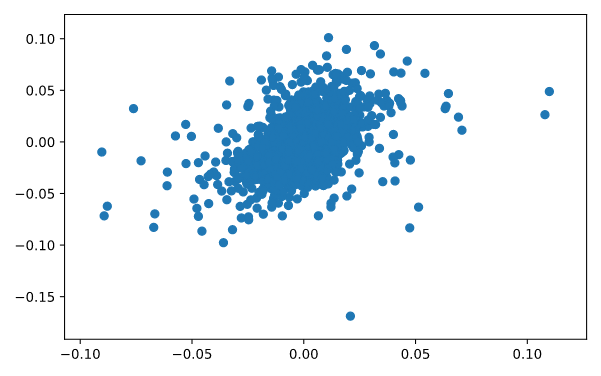


# Flying Saucers Aren't Correlated to Flying Markets

Two trending series may show a strong correlation even if they are completely unrelated. This is referred to as "spurious correlation". That's why when you look at the correlation of say, two stocks, you should look at the correlation of their returns and not their levels.

To illustrate this point, calculate the correlation between the levels of the stock market and the annual sightings of UFOs. Both of those time series have trended up over the last several decades, and the correlation of their levels is very high. Then calculate the correlation of their percent changes. This will be close to zero, since there is no relationship between those two series.

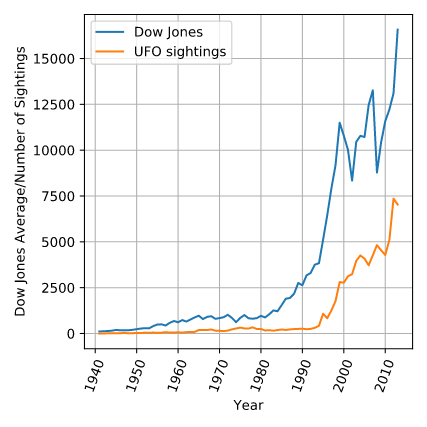

The DataFrame levels contains the levels of DJI and UFO. UFO data was downloaded from www.nuforc.org.

Instructions

1. Calculate the correlation of the columns DJI and UFO.

2. Create a new DataFrame of changes using the .pct_change() method.

3. Re-calculate the correlation of the columns DJI and UFO on the changes.



In [ ]:
# Compute correlation of levels
correlation1 = levels.DJI.corr(levels.UFO)
print("Correlation of levels: ", correlation1)

# Compute correlation of percent changes
changes = levels.pct_change()
correlation2 = changes.DJI.corr(changes.UFO)
print("Correlation of changes: ", correlation2)

'''
<script.py> output:
    Correlation of levels:  0.9399762210726432
    Correlation of changes:  0.06026935462405376
'''

Conclusion

Great work! Notice that the correlation on levels is high but the correlation on changes is close to zero.

# Simple Linear Regression

1. Simple Linear Regressions
In this video you'll learn about simple linear regressions of time series.

2. What is a Regression?
A simple linear regression finds the slope, beta, and intercept, alpha, of a line that's the best fit between a dependent variable, y, and an independent variable, x. The x's and y's can be two time series.

3. What is a Regression?
A linear regression is also known as Ordinary Least Squares, or OLS, because it minimizes the sum of the squared distances between the data points and the regression line.

4. Python Packages to Perform Regressions
Regression techniques are very common, and therefore there are many packages in Python that can be used. In statsmodels, there is OLS. In numpy, there is polyfit, and if you set degree equals 1, it fits the data to a line, which is a linear regression. Pandas has an ols method, and scipy has a linear regression function. Beware that the order of x and y is not consistent across packages. All these packages are very similar, and in this course, you will use the statsmodels OLS.

5. Example: Regression of Small Cap Returns on Large Cap
Now you'll regress the returns of the small cap stocks on the returns of large cap stocks. Compute returns from prices using the "pct_change" method in pandas. You need to add a column of ones as a dependent, right hand side variable. The reason you have to do this is because the regression function assumes that if there is no constant column, then you want to run the regression without an intercept. By adding a column of ones, statsmodels will compute the regression coefficient of that column as well, which can be interpreted as the intercept of the line. The statsmodels method "add constant" is a simple way to add a constant.

6. Regression Example (continued)
Notice that the first row of the return series is NaN. Each return is computed from two prices, so there is one less return than price. To delete the first row of NaN's, use the pandas method "dropna". You're finally ready to run the regression. The first argument of the statsmodel regression is the series that represents the dependent variable, y, and the next argument contains the independent variable or variables. In this case, the dependent variable is the R2000 returns and the independent variables are the constant and SPX returns. The method "fit" runs the regression and results are saved in a class instance called results.

7. Regression Example (continued)
The summary method of results shows the entire regression output. We will only focus on a few items of the regression results. In the red box, the coefficent 1-point-1412 is the slope of the regression, which is also referred to as beta. The coefficient above that is the intercept, which is very close to zero. You can also pull out individual items from results, like the intercept, in results-dot-params zero, and the slope, in results-dot-params one.

8. Regression Example (continued)
Another statistic to take note of is the R-Squared of 0-point-753. That will be discussed next.

9. Relationship Between R-Squared and Correlation
From the scatter diagrams, you saw that the correlation measures how closely the data are clustered along a line. The R-squared also measures how well the linear regression line fits the data. So as you would expect, there is a relationship between correlation and R-squared. The magnitude of the correlation is the square root of the R-squared. And the sign of the correlation is the sign of the slope of the regression line. If the regression line is positively sloped, the correlation is positive and if the the regression line is negatively sloped, the correlation is negative. In the example you just analyzed, of large cap and small cap stocks, the R-Squared was 0-point-753, the slope of the regression was positive, so the correlation is then positive the square root of 0-point-753, or 0-point-868, which can be verified by computing the correlation directly.

10. Let's practice!
Now it's your turn.

# Looking at a Regression's R-Squared

R-squared measures how closely the data fit the regression line, so the R-squared in a simple regression is related to the correlation between the two variables. In particular, the magnitude of the correlation is the square root of the R-squared and the sign of the correlation is the sign of the regression coefficient.

In this exercise, you will start using the statistical package statsmodels, which performs much of the statistical modeling and testing that is found in R and software packages like SAS and MATLAB.

You will take two series, x and y, compute their correlation, and then regress y on x using the function OLS(y,x) in the statsmodels.api library (note that the dependent, or right-hand side variable y is the first argument). Most linear regressions contain a constant term which is the intercept (the <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mstyle mathsize="0.85em">
    <mi>&#x3B1;</mi>
  </mstyle>
</math> in the regression <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mstyle mathsize="0.85em">
    <msub>
      <mi>y</mi>
      <mi>t</mi>
    </msub>
    <mo>=</mo>
    <mi>&#x3B1;</mi>
    <mo>+</mo>
    <mi>&#x3B2;</mi>
    <msub>
      <mi>x</mi>
      <mi>t</mi>
    </msub>
    <mo>+</mo>
    <msub>
      <mi>&#x3F5;</mi>
      <mi>t</mi>
    </msub>
  </mstyle>
</math>
). To include a constant using the function OLS(), you need to add a column of 1's to the right hand side of the regression.

The module statsmodels.api has been imported for you as sm.

Instructions

1. Compute the correlation between x and y using the .corr() method.

2. Run a regression:

 - First convert the Series x to a DataFrame dfx.
 - Add a constant using sm.add_constant(), assigning it to dfx1
 - Regress y on dfx1 using sm.OLS().fit().

3. Print out the results of the regression and compare the R-squared with the correlation.



In [ ]:
# Import the statsmodels module
import statsmodels.api as sm

# Compute correlation of x and y
correlation = x.corr(y)
print("The correlation between x and y is %4.2f" %(correlation))

# Convert the Series x to a DataFrame and name the column x
dfx = pd.DataFrame(x, columns=['x'])

# Add a constant to the DataFrame dfx
dfx1 = sm.add_constant(dfx)

# Regress y on dfx1
result = sm.OLS(y, dfx1).fit()

# Print out the results and look at the relationship between R-squared and the correlation above
print(result.summary())

'''
<script.py> output:
    The correlation between x and y is -0.90
                                OLS Regression Results                            
    ==============================================================================
    Dep. Variable:                      y   R-squared:                       0.818
    Model:                            OLS   Adj. R-squared:                  0.817
    Method:                 Least Squares   F-statistic:                     4471.
    Date:                Sun, 29 Nov 2020   Prob (F-statistic):               0.00
    Time:                        03:42:35   Log-Likelihood:                -560.10
    No. Observations:                1000   AIC:                             1124.
    Df Residuals:                     998   BIC:                             1134.
    Df Model:                           1                                         
    Covariance Type:            nonrobust                                         
    ==============================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
    ------------------------------------------------------------------------------
    const         -0.0052      0.013     -0.391      0.696      -0.032       0.021
    x             -0.9080      0.014    -66.869      0.000      -0.935      -0.881
    ==============================================================================
    Omnibus:                        0.048   Durbin-Watson:                   2.066
    Prob(Omnibus):                  0.976   Jarque-Bera (JB):                0.103
    Skew:                          -0.003   Prob(JB):                        0.950
    Kurtosis:                       2.951   Cond. No.                         1.03
    ==============================================================================
    
    Warnings:
    [1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
'''

Conclusion

Notice that the two different methods of computing correlation give the same result. The correlation is about -0.9 and the R-squared is about 0.81

# Match Correlation with Regression Output
Here are four scatter plots, each showing a linear regression line and an R-squared:

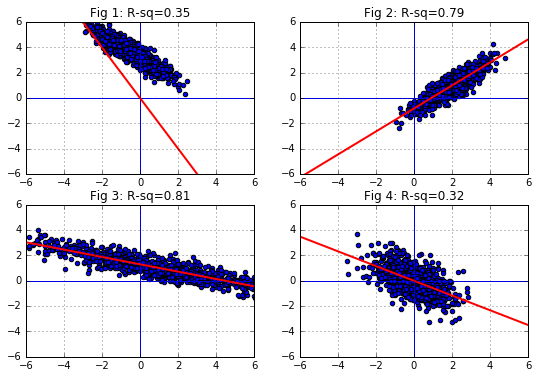

Which correlation is correct?

Wrong Answer

Fig 1: correlation = -0.6
- Notice that there is no intercept in the regression. Therefore, the R-squared here isn't the squared correlation.

Fig 2: correlation = -0.9
 - The slope of the red regression line is positive, so the correlation must be positive, not negative (i.e., the correlation is not -0.9 but +0.9).

Fig 4: correlation = -0.32
 - The correlation is the square root of the R-squared, not the R-squared.

Correct Answer

Fig 3: correlation = -0.9


# Autocorrelation

1. Autocorrelation
So far, you have looked at the correlation of two time series.

2. What is Autocorrelation?
So far, you have looked at the correlation of two time series. Autocorrelation is the correlation of a single time series with a lagged copy of itself. It's also called "serial correlation". Often, when we refer to a series's autocorrelation, we mean the "lag-one" autocorrelation. So when using daily data, for example, the autocorrelation would be the correlation of the series with the same series lagged by one day.

3. Interpretation of Autocorrelation
What does it mean when a series has a positive or negative autocorrelation? With financial time series, when returns have a negative autocorrelation, we say it is "mean reverting".

4. Interpretation of Autocorrelation
Alternatively, if a series has positive autocorrelation, we say it is "trend-following".

5. Traders Use Autocorrelation to Make Money
Lest you think these concepts of autocorrelation are purely theoretical, they are actually used on Wall Street to make money. Many hedge fund strategies are only slightly more complex versions of mean reversion and momentum strategies. Since stocks have historically had negative autocorrelation over horizons of about a week, one popular strategy is to buy stocks that have dropped over the last week and sell stocks that have gone up. For other assets like commodities and currencies, they have historically had positive autocorrelation over horizons of several months, so the typical hedge fund strategy there is to buy commodities that have gone up in the last several months and sell those commodities that have gone down.

6. Example of Positive Autocorrelation: Exchange Rates
Here is an example of how you would compute the monthly autocorrelation for the Japanese Yen-US Dollar exchange rate. The data was downloaded from the FRED website, which stands for Federal Reserve Economic Data. The date column was read in as a string, so before you can compute autocorrelations, you will have to convert the dates in the DataFrame index to a datetime object using the pandas method "to_datetime". Now that it's a datetime object, downsample the data using the resample method. The "rule" argument indicates the desired frequency. 'M' stands for monthly. The how argument indicates how to do the resampling. For example, you can use the first date of the period, the last date, or even an average. Finally, compute the autocorrelation using the pandas method "autocorr". Notice in this example that the autocorrelation is positive, 0-point-0567, so this series exhibits some momentum.

7. Let's practice!
Now it's your turn. You'll look at a few financial time series that have negative autocorrelation.

# A Popular Strategy Using Autocorrelation

One puzzling anomaly with stocks is that investors tend to overreact to news. Following large jumps, either up or down, stock prices tend to reverse. This is described as mean reversion in stock prices: prices tend to bounce back, or revert, towards previous levels after large moves, which are observed over time horizons of about a week. A more mathematical way to describe mean reversion is to say that stock returns are negatively autocorrelated.

This simple idea is actually the basis for a popular hedge fund strategy. If you're curious to learn more about this hedge fund strategy (although it's not necessary reading for anything else later in the course), see here.

You'll look at the autocorrelation of weekly returns of MSFT stock from 2012 to 2017. You'll start with a DataFrame MSFT of daily prices. You should use the .resample() method to get weekly prices and then compute returns from prices. Use the pandas method .autocorr() to get the autocorrelation and show that the autocorrelation is negative. Note that the .autocorr() method only works on Series, not DataFrames (even DataFrames with one column), so you will have to select the column in the DataFrame.

Instructions

1. Use the .resample() method with rule='W' and how='last'to convert daily data to weekly data.
 - The argument how in .resample() has been deprecated.
 - The new syntax .resample().last() also works.

2. Create a new DataFrame, returns, of percent changes in weekly prices using the .pct_change() method.

3. Compute the autocorrelation using the .autocorr() method on the series of closing stock prices, which is the column 'Adj Close' in the DataFrame returns.



In [ ]:
# Convert the daily data to weekly data
MSFT = MSFT.resample(rule='W', how='last')

# Compute the percentage change of prices
returns = MSFT.pct_change()

# Compute and print the autocorrelation of returns
autocorrelation = returns['Adj Close'].autocorr()
print("The autocorrelation of weekly returns is %4.2f" %(autocorrelation))

'''
<script.py> output:
    The autocorrelation of weekly returns is -0.16
'''

Conclusion

Notice how the autocorrelation of returns for MSFT is negative, so the stock is 'mean reverting'

# Are Interest Rates Autocorrelated?

When you look at daily changes in interest rates, the autocorrelation is close to zero. However, if you resample the data and look at annual changes, the autocorrelation is negative. This implies that while short term changes in interest rates may be uncorrelated, long term changes in interest rates are negatively autocorrelated. A daily move up or down in interest rates is unlikely to tell you anything about interest rates tomorrow, but a move in interest rates over a year can tell you something about where interest rates are going over the next year. And this makes some economic sense: over long horizons, when interest rates go up, the economy tends to slow down, which consequently causes interest rates to fall, and vice versa.

The DataFrame daily_rates contains daily data of 10-year interest rates from 1962 to 2017.

Instructions

1. Create a new DataFrame, daily_diff, of changes in daily rates using the .diff() method.

2. Compute the autocorrelation of the column 'US10Y' in daily_diff using the .autocorr() method.

3. Use the .resample() method with arguments rule='A' to convert to annual frequency and how='last'.

 - The argument how in .resample() has been deprecated.
 - The new syntax .resample().last() also works.

4. Create a new DataFrame, yearly_diff of changes in annual rates and compute the autocorrelation, as above.




In [ ]:
# Compute the daily change in interest rates 
daily_diff = daily_rates.diff()

# Compute and print the autocorrelation of daily changes
autocorrelation_daily = daily_diff['US10Y'].autocorr()
print("The autocorrelation of daily interest rate changes is %4.2f" %(autocorrelation_daily))

# Convert the daily data to annual data
yearly_rates = daily_rates.resample(rule='A').last()

# Repeat above for annual data
yearly_diff = yearly_rates.diff()
autocorrelation_yearly = yearly_diff['US10Y'].autocorr()
print("The autocorrelation of annual interest rate changes is %4.2f" %(autocorrelation_yearly))

'''
<script.py> output:
    The autocorrelation of daily interest rate changes is 0.07
    The autocorrelation of annual interest rate changes is -0.22
'''


Conclusion

Notice how the daily autocorrelation is small but the annual autocorrelation is large and negative